# Instagram Reach Analysis using Python

This notebook provides an in-depth analysis of Instagram reach. We will explore various metrics such as impressions, likes, comments, shares, and profile visits to understand user engagement. Additionally, we will use a predictive model to forecast impressions based on other engagement metrics.

## Importing Necessary Libraries and Dataset
We'll start by importing the required Python libraries and loading the dataset.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

# Load the dataset
data = pd.read_csv("Instagram data.csv", encoding='latin1')
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


## Data Cleaning and Exploration
Let's check for missing values and clean the data.

In [21]:
# Check for missing values
data.isnull().sum()

# Drop rows with missing values
data = data.dropna()

In [7]:
# Check dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## Analyzing Instagram Reach
We will explore the distribution of impressions from various sources.

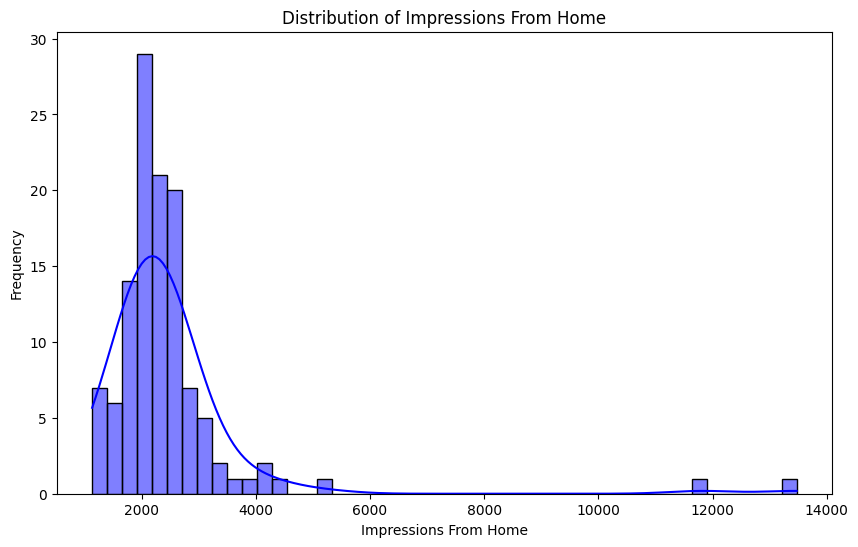

In [8]:
# Distribution of impressions from home
plt.figure(figsize=(10, 6))
plt.title("Distribution of Impressions From Home")
sns.histplot(data['From Home'], kde=True, color='blue')
plt.xlabel("Impressions From Home")
plt.ylabel("Frequency")
plt.show()

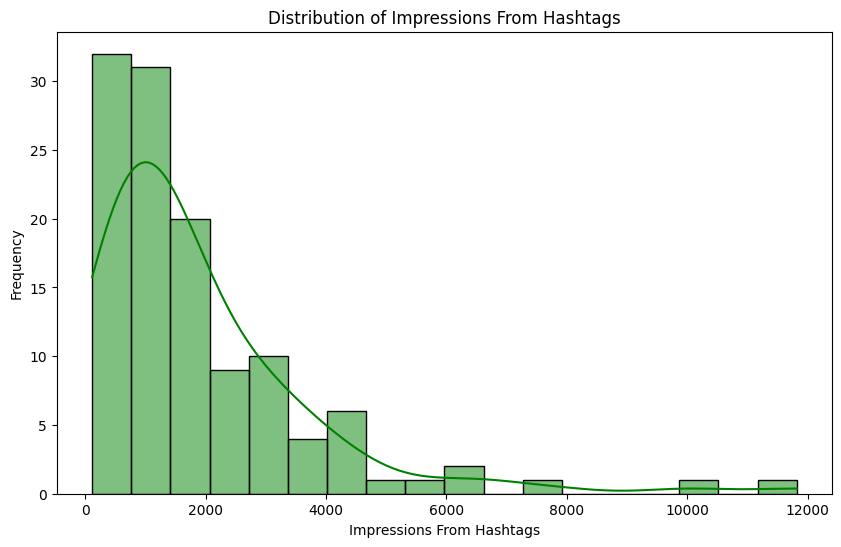

In [9]:
# Distribution of impressions from hashtags
plt.figure(figsize=(10, 6))
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(data['From Hashtags'], kde=True, color='green')
plt.xlabel("Impressions From Hashtags")
plt.ylabel("Frequency")
plt.show()

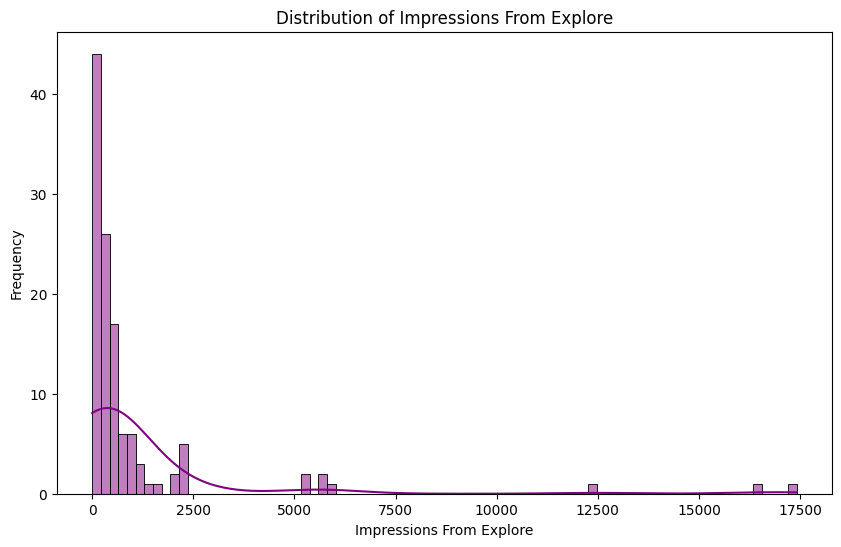

In [10]:
# Distribution of impressions from explore
plt.figure(figsize=(10, 6))
plt.title("Distribution of Impressions From Explore")
sns.histplot(data['From Explore'], kde=True, color='purple')
plt.xlabel("Impressions From Explore")
plt.ylabel("Frequency")
plt.show()

### Impressions from Various Sources
We'll create a pie chart to visualize the proportion of impressions from different sources.

In [11]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

fig = px.pie(values=values, names=labels, title='Impressions from Various Sources', hole=0.5, color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

## Analyzing Content
We'll use word clouds to analyze frequently used words in captions and hashtags.

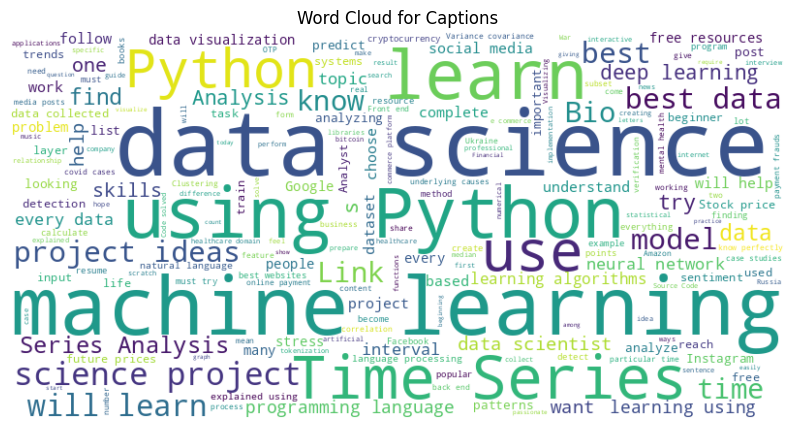

In [12]:
# Word cloud for captions
text = " ".join(str(i) for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Captions")
plt.show()

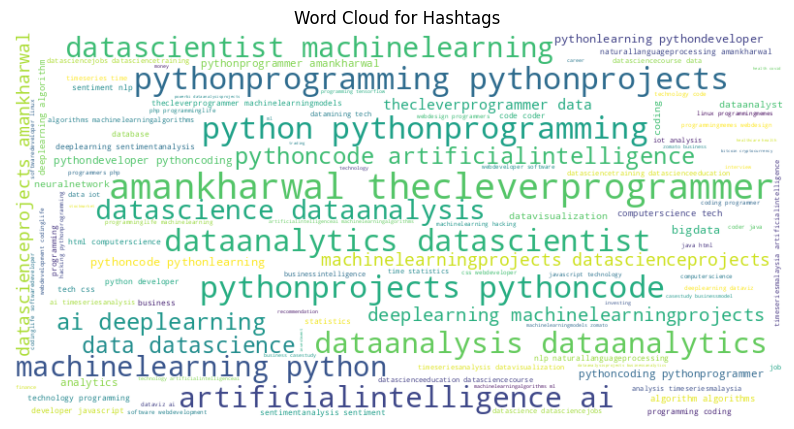

In [13]:
# Word cloud for hashtags
text = " ".join(str(i) for i in data.Hashtags)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Hashtags")
plt.show()

## Analyzing Relationships
Let's visualize relationships between impressions and other engagement metrics.

In [14]:
# Relationship between likes and impressions
figure = px.scatter(data, x="Impressions", y="Likes", size="Likes", trendline="ols", title="Likes vs Impressions")
figure.show()

In [15]:
# Relationship between comments and impressions
figure = px.scatter(data, x="Impressions", y="Comments", size="Comments", trendline="ols", title="Comments vs Impressions")
figure.show()

In [16]:
# Relationship between shares and impressions
figure = px.scatter(data, x="Impressions", y="Shares", size="Shares", trendline="ols", title="Shares vs Impressions")
figure.show()

In [17]:
# Relationship between saves and impressions
figure = px.scatter(data, x="Impressions", y="Saves", size="Saves", trendline="ols", title="Saves vs Impressions")
figure.show()

## Correlation Analysis
Analyzing the correlation between features to identify strong relationships.

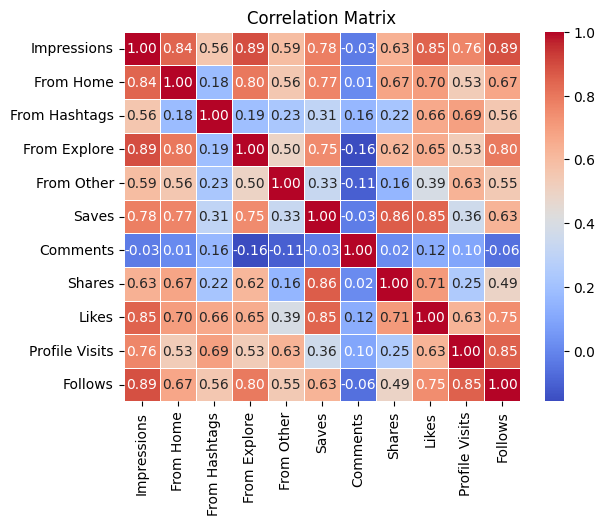

In [18]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Analyzing Conversion Rate
Conversion rate helps us understand how effective profile visits are in gaining followers.

In [19]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(f"Conversion Rate: {conversion_rate:.2f}%")

Conversion Rate: 41.00%


## Prediction Model
We'll use the Passive Aggressive Regressor to predict impressions based on engagement metrics.

In [20]:
# Preparing the data
X = data[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
y = data['Impressions']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
score = model.score(X_test, y_test)
print(f"Model Score: {score:.2f}")

# Predicting impressions for a new set of metrics
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
predicted_impressions = model.predict(features)
print(f"Predicted Impressions: {predicted_impressions[0]:.2f}")

Model Score: 0.88
Predicted Impressions: 11386.31


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

